In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Importing data
data = pd.read_csv("~/Desktop/Desktop/Dataset/Mall_Customers_BP.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Checking all the data types
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
# Performing Standard Scaling while pre-processing data
scaler = StandardScaler()
df[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])
print(df)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19            0.000000                0.387755
1             2    Male   21            0.000000                0.816327
2             3  Female   20            0.008197                0.051020
3             4  Female   23            0.008197                0.775510
4             5  Female   31            0.016393                0.397959
..          ...     ...  ...                 ...                     ...
195         196  Female   35            0.860656                0.795918
196         197  Female   45            0.909836                0.275510
197         198    Male   32            0.909836                0.744898
198         199    Male   32            1.000000                0.173469
199         200    Male   30            1.000000                0.836735

[200 rows x 5 columns]


In [7]:
# Optimum number of clusters using elbow method -

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)

# Making a seperate array file having data for Annual income and spending score

array1 = df['Annual Income (k$)'].to_numpy()
array2 = df['Spending Score (1-100)'].to_numpy()
array = np.array(list(zip(array1, array2))).reshape(len(array1), 2)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(array)

    distortions.append(sum(np.min(cdist(array, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / array.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(array, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / array.shape[0]
    mapping2[k] = kmeanModel.inertia_

1 : 0.28732920189537803
2 : 0.24292656691665446
3 : 0.17933377150541488
4 : 0.15082836340613298
5 : 0.11815479432710524
6 : 0.11112000368540828
7 : 0.1044359606420634
8 : 0.09393611512914361
9 : 0.08643992903159538
10 : 0.08059377195989027
11 : 0.07540293005035847
12 : 0.07245081781913605
13 : 0.06855406127413047
14 : 0.06588949103132469


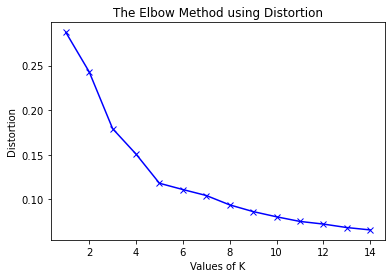

In [8]:
# Using Distortion -
# Tabulating the results -

for key,val in mapping1.items():
    print(str(key)+' : '+str(val))

# Visualizing the result -

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

1 : 23.040720326039906
2 : 13.993505283127979
3 : 9.058985215159455
4 : 6.110312266413655
5 : 3.583117905952559
6 : 3.0987079488159965
7 : 2.6260623772655123
8 : 2.2191023969247357
9 : 1.8826909978439232
10 : 1.6412663266849248
11 : 1.4553320984391274
12 : 1.3229025293309493
13 : 1.165437147535807
14 : 1.0636880892948428


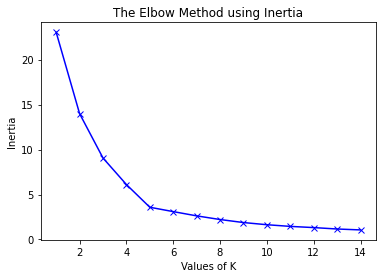

In [9]:
# Using Inertias -
# Tabulating the results -

for key,val in mapping2.items():
    print(str(key)+' : '+str(val))

# Visualizing the result -

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
# From the two graphs it can be concluded that 5 is the optimum number of cluster for our dataset.

[[0.08792846 0.79962894]
 [0.6        0.16443149]
 [0.58638083 0.82783883]
 [0.09265859 0.20319432]
 [0.33029751 0.49508692]]


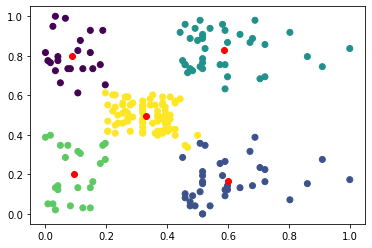

In [10]:
# Finding Centroids -
data = pd.DataFrame(array, columns=('Annual Income (k$)', 'Spending Score (1-100)'))
data.head()

kmeans = KMeans(n_clusters=5).fit(data)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c= kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()